In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append('../www')

In [2]:
import requests
import pandas as pd
import ast
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##  Import data_exploration2.py
    1. Connect to UCSD VPN via UCSD Protected, https://vpn.ucsd.edu/+CSCOE+/logon.html, or AnyConnect.
    2. Import data_exploration2.py into notebook
    3. When prompted conda/pip install packages as needed
    4. Test functionality with the code below

In [28]:
from data_exploration2 import *

# Current API Methods

## Statistical APIs

###  Correlation coefficient between 2 columns in a table.

In [11]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'


col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('CORR',col_pair, table_pair, key_pair)

print("Correlation: ",response)

('Correlation: ', 0.00643616130791823)


### Covariance coefficient between 2 columns in a table.

In [12]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'

col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('covar_samp',col_pair, table_pair, key_pair)

print("Covariance: ",response)

('Covariance: ', 93.5788384664056)


### Simple aggregates  between 2 columns in a table.

In [13]:
# select count(a.numorderlines), max(b.totalprice)
# from orders a, orderlines b
# where a.orderid = b.orderid
# group by a.numorderlines

response = Simpleagg(agg_func_pair=['COUNT','MAX'], col_pair=['numorderlines','numunits'],table_pair=['orders','orderlines'],
                 key_pair=['orderid','orderid'])

pd.DataFrame.from_records(response, columns=['Count','Max']).head(10)

,Count,Max
0,34,1
1,32,1
2,50,4
3,2128,55
4,612,15
5,116,9
6,139561,3000
7,1100,22
8,26,1
9,781,12


### Simple Histogram

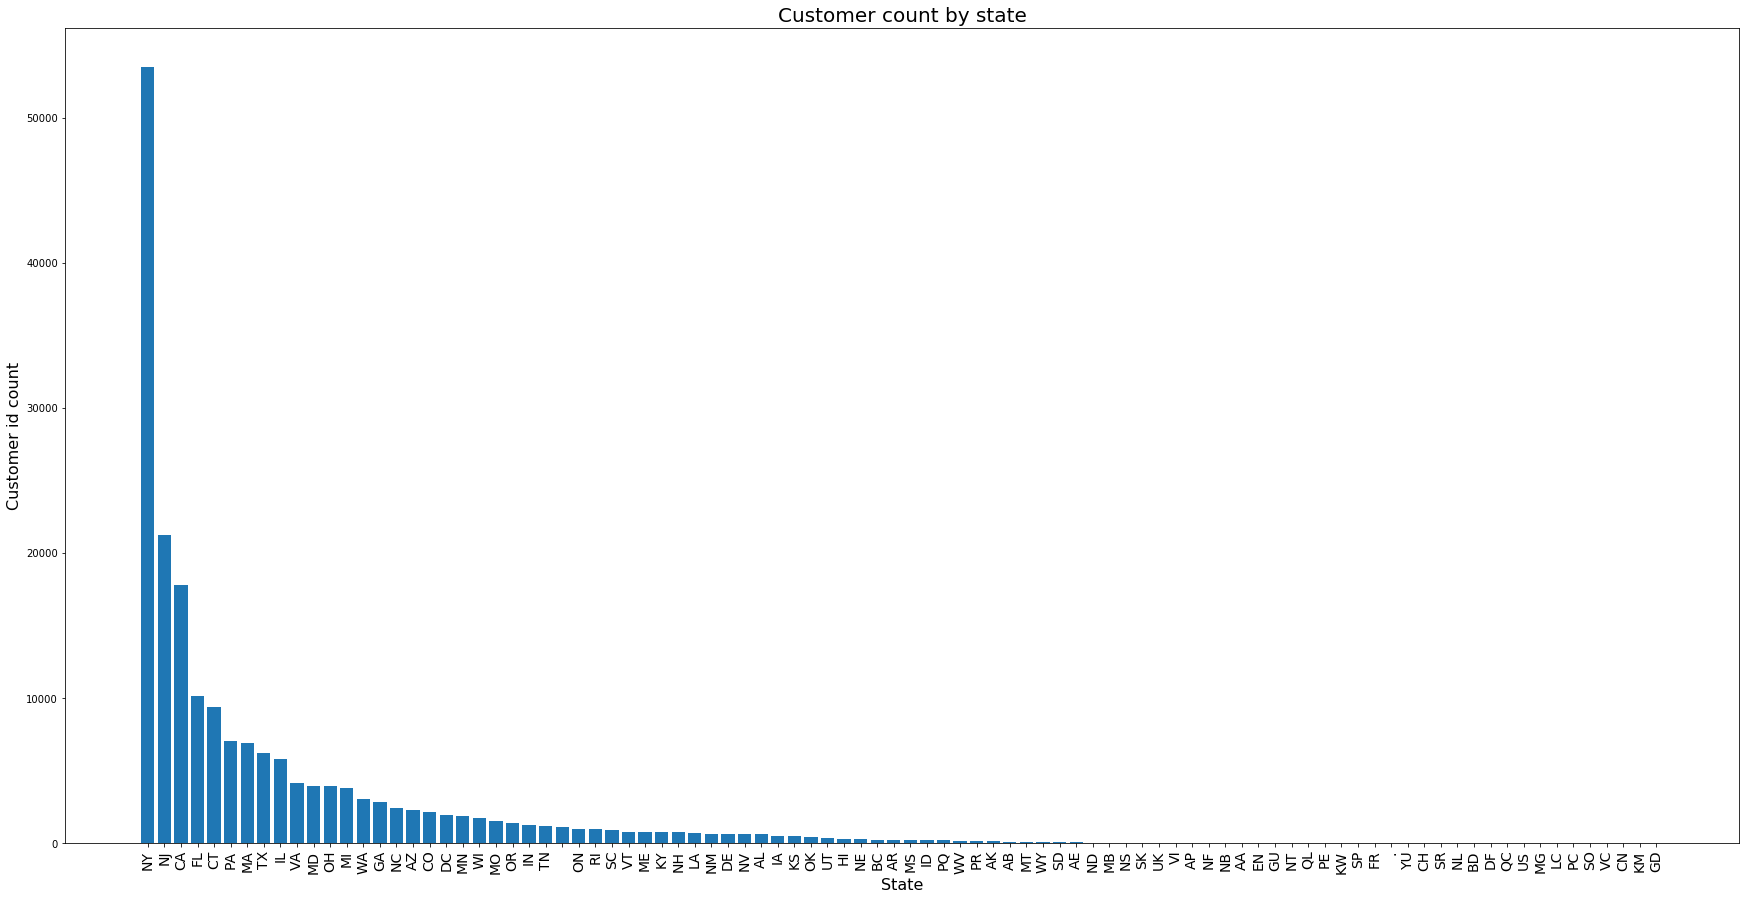

In [15]:
table = "orders"
groupby = 'state'
count = 'customerid'
response = Histogram(table, groupby, count)
# data = ast.literal_eval(response)
df = pd.DataFrame(response)
x = np.array(range(len(df['Group'])))
y = np.array(df['Count'])
my_xticks = df['Group'].values
plt.figure(figsize=[30,15])
plt.xticks(x, my_xticks, fontsize=14, rotation='vertical')
plt.bar(x, y)
plt.title('Customer count by state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Customer id count', fontsize=16);


## Machine Learning and Data Exploration API


### Get classification and level 2 categories based on node id.


In [36]:
nodeids = [1,173508,266162]
json_result = GetTextAttributes(nodeids)
df = pd.DataFrame(json_result).rename(columns={"classification": "Classification", "level_2": "Category"})
df

,Classification,Category,nodeID
0,Arts & Photography,N/A,1
1,Architecture,Architecture,173508
2,Architectural Buildings,Architecture,266162


### We support both Classifications and Categories. 

Using getTextAttributes will give you the Classifications (hereby referred to as Classification Category) while getCategories returns Categories (which we will call Level 2 Categories). Note that getTextAttributes requires nodeIDs as input which can be gotten from getNodeIds

### Get the node IDs from a specific Classification category

In [43]:
pd.DataFrame(getNodeIds(["Women's Fiction",'Education & Reference'])).head()

,nodeID
0,2732
1,11661
2,2737
3,11686
4,10020691011


### Get all the Categories 

In [44]:
cats = getCategories()
pd.DataFrame(cats).head(20)

,category
0,Abuse
1,Accounting
2,Action & Adventure
3,Action & Adventure Manga
4,"Activities, Crafts & Games"
5,Addiction & Recovery
6,Administration & Medicine Economics
7,Administrative Law
8,Adoption
9,Adventure Travel


### Get the n top categories

In [132]:
n=10
getTopCategories(n)

[{'category': 'Education & Reference'},
 {'category': 'Geography & Cultures'},
 {'category': 'Programming'},
 {'category': 'Science, Nature & How It Works'},
 {'category': 'Graphics & Design'},
 {'category': 'Animals'},
 {'category': 'Early Learning'},
 {'category': 'Engineering'},
 {'category': 'Home Improvement & Design'},
 {'category': 'Growing Up & Facts of Life'}]

###  What are the top Level 2 Categories of books read in a particular month(s)?
    Sample Query: What are the top 3 categories of books that are most read around Christmas?
    
    @app.route("/api/Top_Categories/<num_categories>/<month>")

In [46]:
num_categories = 5
months = [12]
tc = OptimizedTopCategories(num_categories, months)
pd.DataFrame(tc,columns=['Category','num_sold'])

,Category,num_sold
0,Education & Reference,9689.0
1,Graphics & Design,4070.0
2,Geography & Cultures,3763.0
3,Programming,3699.0
4,"Science, Nature & How It Works",2997.0


###  Generalized Query: What time of the year are the sales of  X  Level 2 Category (or Categories) of book the highest?
    Sample Query: What time of the year are the sales of “Education” books the highest?

    

In [18]:
list='Education & Reference,Drawing,Architecture'
category_list = list.split(",")

print("\nHighest Monthly Sales By Category: \n")

#hmsb = HighestMonthlySalesByCategory('Education & Reference')
limit = 5
hmsb = HighestMonthlySalesByCategory(category_list, 5)
print(hmsb)



Highest Monthly Sales By Category: 

[{'mon': 12, 'num_sold': 12356}, {'mon': 11, 'num_sold': 7839}, {'mon': 1, 'num_sold': 5572}, {'mon': 5, 'num_sold': 4413}, {'mon': 6, 'num_sold': 4143}]


###  Which book Classification Categories show a downward trend in demand in a particular month?
    Sample Query: Which book categories show a downward trend in demand in Winter and Spring?
    
    @app.route("/api/Downward_Sales/<season>")

In [21]:
j = Downward_Sales('spring')
df = pd.DataFrame(j)
df.set_index('category', inplace=True)
df.head(10)

,SaleTrend
category,
2963,-364
8944264011,-257
8951153011,-153
8944258011,-130
1007,-116
3564986011,-86
3094,-78
2990,-74
8883833011,-70


### Is there a category which performs poorly in a date range?
    Sample Query: Is there a category that we should discontinue stocking?

    @app.route("/api/Discontinue_Stocking/<threshold>/<startyear>/<endyear>")

In [22]:
thresh=5
st_year=2013
end_year=2014
j = Discontinue_Stocking(thresh,st_year,end_year)
df = pd.DataFrame(j)
df.head(10)

,category
0,10020677011
1,10020679011
2,10020695011
3,10020696011
4,10020700011
5,10020701011
6,10020702011
7,10020703011
8,10020704011
9,10020709011


### Sentiment polarity score for all reviews extracted for Solr datasource
    @app.route('/sentiment_polarity/<category>/<month>', methods=['GET'])

In [20]:
print("Sentiment Polarity: \n")
sr = Sales_Reviews('Education', 3) 
print (sr)

Sentiment Polarity: 

[{"index":0,"billdate":1298937600000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":1,"billdate":1299024000000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":2,"billdate":1299110400000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":3,"billdate":1299196800000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":4,"billdate":1299456000000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":5,"billdate":1299628800000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sentiment_polarity":0.1951358826},{"index":6,"billdate":1299801600000,"productid":11083,"asin":"0005126207","nodeid":"7009083011","numunits":1,"Sen